___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Universities Data Analysis and K-means Clustering Project 

In this project we attempt to use KMeans Clustering to cluster Universities into to two groups; Private and Public.  Libraries used in this project: Scikit-learn, Seaborn, Matplotlib and Pandas.


#### It is important to note that we actually have the labels for the dataset, but we will NOT use them for the KMeans clustering algorithm, since it is an unsupervised learning algorithm. 

When using the K-means algorithm under normal circumstances, it is with data that does not have labels. In our case we will use the labels with an attempt to see how well the algorithm performed.  Since a classification report is usually not generated for K-means clustering, the classification report and confusion matrix at the end of the project will not truly make real world sense.

This project was done through Jose Portilla (head of Data Science at Pierian Data Inc.) on Udemy (Python for Data Science and Machine Learning Bootcamp).

#### Column descriptions:
* Private: A factor with levels No and Yes indicating private or public university
* Apps:   Number of applications received
* Accept:   Number of applications accepted
* Enroll:   Number of new students enrolled
* Top10perc:   Pct. new students from top 10% of H.S. class
* Top25perc:   Pct. new students from top 25% of H.S. class
* F.Undergrad:   Number of fulltime undergraduates
* P.Undergrad:   Number of parttime undergraduates
* Outstate:   Out-of-state tuition
* Room.Board:   Room and board costs
* Books:   Estimated book costs
* Personal:   Estimated personal spending
* PhD Pct.:   faculty with Ph.D.’s
* Terminal Pct.:   faculty with terminal degree
* S.F.Ratio:   Student/faculty ratio
* perc.alumni:   Pct. alumni who donate
* Expend:   Instructional expenditure per student
* Grad.Rate:   Graduation rate

## Viewing the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
college = pd.read_csv('College_Data', index_col = 0)

In [6]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [4]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Exploratory Data Analysis

**Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.**

<Figure size 864x576 with 0 Axes>

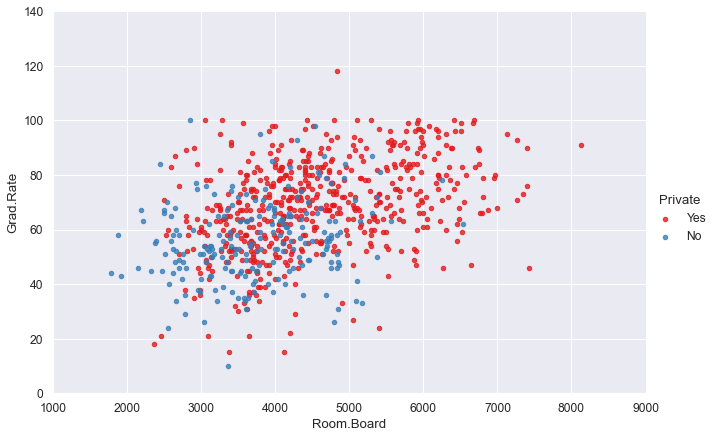

In [9]:
sns.set_style('darkgrid')
sns.set(font_scale = 1.1)
plt.figure(figsize = (12,8))
g = sns.lmplot(data = college, x= 'Room.Board', y= 'Grad.Rate', palette = 'Set1', hue = 'Private', truncate= False,
               scatter_kws = {'s':20}, fit_reg = False, legend_out = True, height=6,aspect=1.5)
g.set(ylim = (0, 140))
g.set(xlim = (1000, 9000));

In [10]:
college[['Room.Board', 'Grad.Rate']].corr()

,Room.Board,Grad.Rate
Room.Board,1.000000,0.424942
Grad.Rate,0.424942,1.000000


In [11]:
# From the scatterplot and correlation coeficient we can see that there is a weak positive correlation between the costs for 
# boarding and the graduation rate of a university. 
# I.e. In many cases if the boarding costs of a university is higher, then the graduation rate is also higher, and in many other
# cases if the boarding costs of a university is higher then the graduation rate for the university is not among the higher rates.

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

<Figure size 864x576 with 0 Axes>

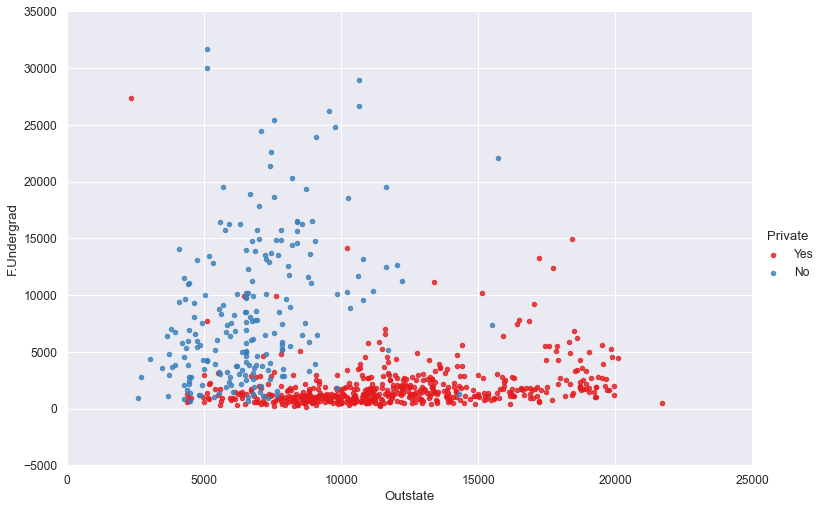

In [16]:
plt.figure(figsize = (12,8))
g = sns.lmplot(data = college, x= 'Outstate', y= 'F.Undergrad', palette = 'Set1', hue = 'Private',
               scatter_kws = {'s':20}, fit_reg = False, legend_out = True, height = 7, aspect = 1.5)
g.set(ylim = (-5000, 35000))
g.set(xlim = (0, 25000));

In [17]:
private = college[college['Private'] == 'Yes']
public = college[college['Private'] == 'No']

private[['Outstate', 'F.Undergrad']].corr()

,Outstate,F.Undergrad
Outstate,1.000000,0.193045
F.Undergrad,0.193045,1.000000


In [18]:
public[['Outstate', 'F.Undergrad']].corr()

,Outstate,F.Undergrad
Outstate,1.000000,0.352658
F.Undergrad,0.352658,1.000000


In [ ]:
# There is a clear distinction between the tuition for private and public universities.  Undergraduate students that go to 
# private universities pay higher tuition fees.

# There is a very weak correlation between the number of outstate students and the number of undergraduate students for both 
# private or public universities.

**Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist').**

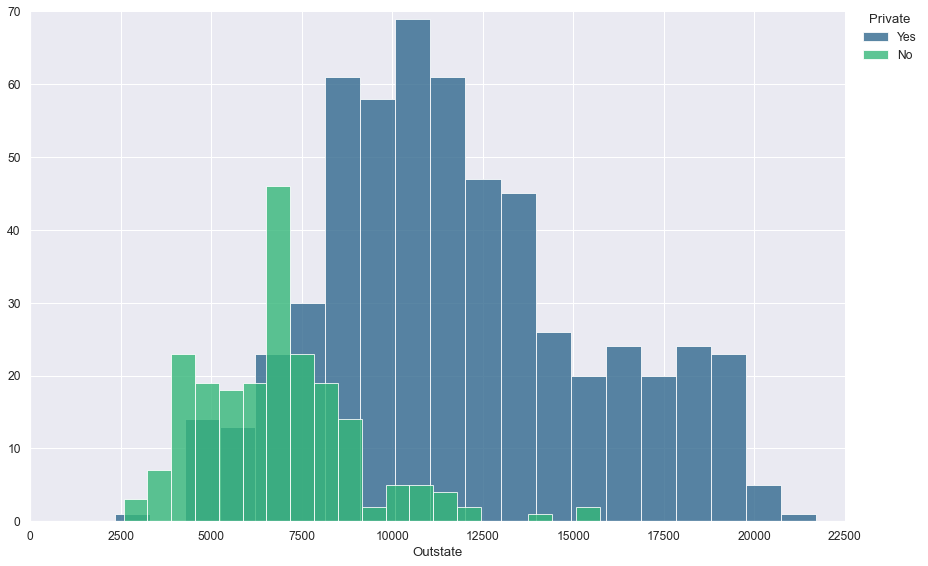

In [60]:
g = sns.FacetGrid(data=college, hue = 'Private', palette = 'viridis', height = 8, aspect = 1.5)
g.map(plt.hist, 'Outstate', bins = 20, alpha = 0.8)
g.add_legend(bbox_to_anchor=(0.93, 0.99), loc ='upper left', title = 'Private')
g.set(xlim = (0,22500))
g.set(ylim = (0,70));

In [ ]:
# From the histogram plot we see that most Outstate students go to private universities

**Create a similar histogram for the Grad.Rate column.**

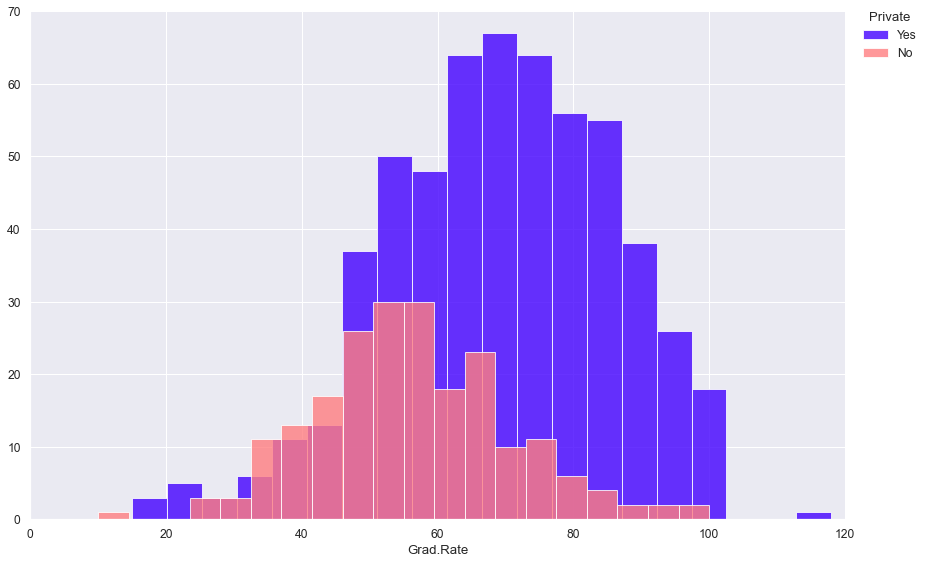

In [61]:
f = sns.FacetGrid(data= college, hue = 'Private', palette = 'gnuplot2', height = 8, aspect = 1.5)
f.map(plt.hist, 'Grad.Rate', bins = 20, alpha= 0.8)
f.add_legend(bbox_to_anchor=(0.93, 0.99), loc ='upper left', title = 'Private')
f.set(xlim = (0,120))
f.set(ylim = (0,70));

In [63]:
# The graduation rates at private universities, in general, are much better than at public universities.

# For the public universities there are about 2 universities with a graduation rate of 95-100%, 2 with a graduation rate of 
# 90-95%, 2 with 85-90% etc.
# Most private universities have a graduation rate between 61-86%
# Approximately 38 private universities have a graduation rate 86-91%, 26 with a graduation rate between 91-96% and about 17
# with a graduation rate between 96-100%

# The university with a graduation rate above 100% needs to be corrected to 100%

**What is the name of the university that has a graduation rate above 100?**

In [64]:
grad_100 = college[college['Grad.Rate'] > 100]
grad_100

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**Set their graduation rate to 100.**

In [65]:
college.loc['Cazenovia College', 'Grad.Rate'] = 100

In [66]:
college[college['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


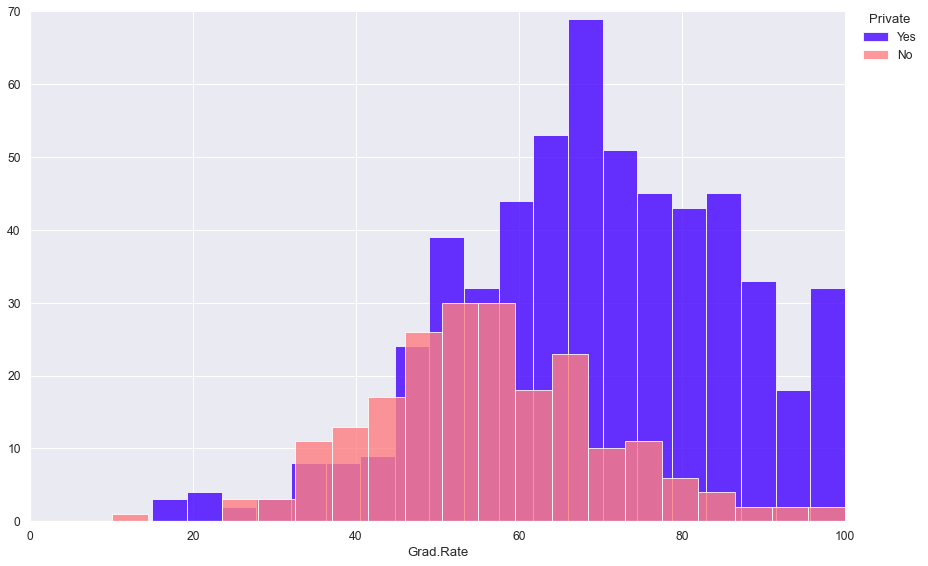

In [68]:
h = sns.FacetGrid(data= college, hue = 'Private', palette = 'gnuplot2', height = 8, aspect = 1.5)
h.map(plt.hist, 'Grad.Rate', bins = 20, alpha= 0.8)
h.add_legend(bbox_to_anchor=(0.93, 0.99), loc ='upper left', title = 'Private')
h.set(xlim = (0,100))
h.set(ylim = (0,70));

## K Means Cluster Creation

We will now create the Cluster labels.

**Import KMeans from Scikit-learn.**

In [86]:
from sklearn.cluster import KMeans

**Create an instance of a K Means model with 2 clusters.**

In [108]:
kmeans = KMeans(n_clusters = 2)

**Fit the model to all the data except for the Private label.**

In [109]:
# As mentioned in the introduction, we do have the labels for this dataset, but will not uses them to build our model.  We are 
# using an unsupervised learning algorithm, which assumes that labels for the data has not been provided.

kmeans.fit(college.drop('Private', axis = 1))

KMeans(n_clusters=2)

**What are the cluster center vectors?**

In [110]:
# Each list (in our case, we have 2 lists for the 2 clusters that we created) gives the centres for the different variables 
# in our dataframe.

kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01, 7.93721973e-01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01, 3.14814815e-01]])

## Evaluating our Model

We will take advantage of the fact that we have been provided with the labels of the data, by using it to evaluate our clusters.  In the real world labels are generally not provided.

**Create a new column for df called 'Cluster', which reflects a 1 for a Private university / college, and a 0 for a public university / college.**

In [111]:
college['Cluster'] = ""

In [112]:
college.head(5)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,


In [113]:
college['Cluster'] = college['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

In [114]:
college.tail()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1
York College of Pennsylvania,Yes,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99,1


In [115]:
# Predictions determining which colleges / universities are private and which are public:

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Create a confusion matrix and classification report to see how well the K-Means clustering model predicted without any labels.**

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
print(confusion_matrix(college['Cluster'], kmeans.labels_))
print(classification_report(college['Cluster'], kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



## Conclusion

* 138 Public universities / colleges are predicted correctly and 74 are wrongly predicted as public.
* 34 Private universities / colleges are predicted correctly and 531 are wrongly predicted as private.

* The models ability to correctly identify true positives (predict public universities) is 65% and its accuracy in predicting public universities / colleges is 31%
* The models ability to correctly identify true negatives (predict private universities) is 6% and its accuracy in predicting public universities / colleges is 10%

#### The model does not perform too bad on predicting which universities / colleges are public.  Howerever this is not a good model to make a distinction between public and private universities / colleges.